# Linear regression

## Introduction

Let $Y$ be a **dependent variable**, also called **response variable** or **predictor**, whose behaviour can be explained by the **independent variables** $X_1, X_2, \ldots, X_k$, also known as **explanatory variables** or **features**.

Unlike classification, where $Y$ can take a finite number of outcomes, in regression $Y$ is a continuous variable.

In linear regression, the relationship between the independent and dependent variables can be described as follows:
$$Y = \beta_0 + \beta_1 X_1 + \ldots \beta_k X_k + \epsilon$$
where $\beta_0, \beta_1, \ldots, \beta_k$ are the model parameters and $\epsilon$ is a random error. Typically, $\epsilon$ is assumed to follow a normal distribution with zero mean and constant variance.

## Simple linear regression

In the most simple scenario, when there is a single independent variable $X$, the model is equivalent to
$$Y = \beta_0 + \beta_1 X + \epsilon$$
In other words, $(X, Y)$ lies around a straight line with intercept $\beta_0$ and slope $\beta_1$.

To illustrate the model, lets sample a few points and plot both the sampled points and the straight line.

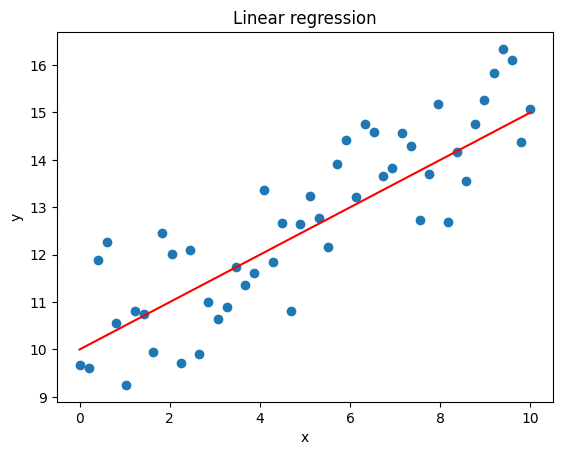

In [1]:
import numpy as np
import matplotlib.pyplot as plt

rng = np.random.default_rng(seed=1000)
beta = [10, 0.5]
x = np.linspace(0, 10)
error = rng.normal(0, 1, size=x.shape)
y = beta[0] + beta[1]*x + error

plt.figure()
plt.title("Linear regression")
plt.xlabel("x")
plt.ylabel("y")
plt.plot(x, y, "o")
plt.plot(x, beta[0] + beta[1]*x, "r-")
plt.show()

## Estimation

In real life applications, the model parameters are unknown and need to be estimated from the data. To do so, we need to ask ourselves which is the best straight line that describes our data? And what does exactly *best straight line* mean? What criteria do we use? Usually, we choose the parameters that minimizes the sum of the squared differences between the observed independent variable and the output of the linear function of the dependent variables.
$$(\hat{\beta}_0, \hat{\beta}_1, \ldots, \hat{\beta}_k) = \underset{(\beta_0, \beta_1, \ldots, \beta_k)}{\text{arg min}} \sum_{i=1}^{n} (y_i - \beta_0 - \beta_1 x_{i1} - \ldots - \beta_k x_{ik})^2$$

We call this estimator as **ordinary least squares** estimator.

To simplify the notation, let
* $\mathbf{y} = (y_1, \ldots, y_n)$ be the vector of observed independent variables,
* $\mathbf{\beta} = (\beta_0, \beta_1, \ldots, \beta_k)$ be the vector of model parameters, and
* $\mathbf{X} = (x_{ij})$ be the matrix of observed dependent variables, where each row $\mathbf{x}_i = (1, x_{i1}, \ldots, x_{ik})$ represents an observation and each column represents a feature. The first column of $\mathbf{X}$ is filled with ones and is the column corresponding to the intercept $\beta_0$.

The ordinary least squares estimator can be rewritten as
$$\hat{\beta} = \underset{\beta}{\text{arg min}}\sum_{i=1}^{n} (y_i - \mathbf{x}_i^{\top} \mathbf{\beta})^2$$
Simplifying even further
$$\hat{\beta} = \underset{\beta}{\text{arg min }} (\mathbf{y} - \mathbf{X\beta})^{\top} (\mathbf{y} - \mathbf{X\beta})$$

It can be shown that this estimator is the solution of the linear equation
$$\mathbf{X}^{\top} \mathbf{X} \hat{\beta} = \mathbf{X}^{\top} \mathbf{y}$$
See [Maximum likelihood estimator](#maximum-likelihood-estimator) for the proof.

In [3]:
from numpy.linalg import solve

X = np.column_stack((np.ones(x.shape), x))
with np.printoptions(precision=2, threshold=10, edgeitems=3):
    print("Matrix of observed independent variables:")
    print(X)
    print("Vector of observed independent variables:")
    print(y)

beta_ols = solve(X.T @ X, X.T @ y)
print("Ordinary least squares estimator:")
print(beta_ols)

Matrix of observed independent variables:
[[ 1.    0.  ]
 [ 1.    0.2 ]
 [ 1.    0.41]
 ...
 [ 1.    9.59]
 [ 1.    9.8 ]
 [ 1.   10.  ]]
Vector of observed independent variables:
[ 9.68  9.62 11.88 ... 16.1  14.38 15.08]
Ordinary least squares estimator:
[9.95883682 0.54698849]


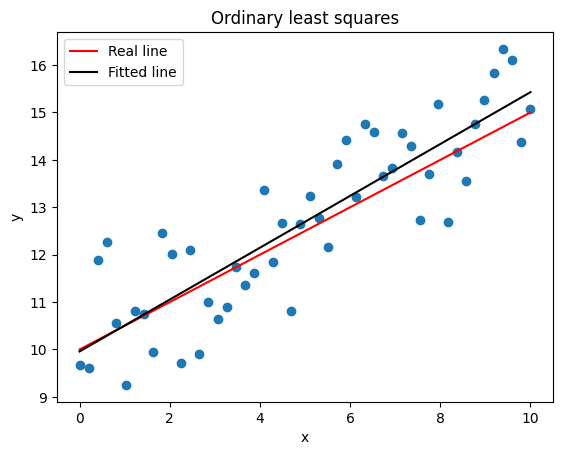

In [4]:
plt.figure()
plt.title("Ordinary least squares")
plt.xlabel("x")
plt.ylabel("y")
plt.plot(x, y, "o")
plt.plot(x, beta[0] + beta[1]*x, "r-", label="Real line")
plt.plot(x, beta_ols[0] + beta_ols[1]*x, "k-", label="Fitted line")
plt.legend()
plt.show()

### Systolic blood pressure

**(Kalbfleisch, Probability and Statistical Inference, Vol. 2, Section 14.3, Problem 8)** The following table gives measurements of systolic blood pressure for 20 men of various ages:

In [5]:
import pandas as pd

df_blood = pd.read_csv("data/blood-pressure.csv")
df_blood.head()

,age,pressure
0,30,108
1,30,110
2,30,106
3,40,125
4,40,120


We have two variables:
- *age* The age of the men in years.
- *pressure* The measured pressure for each person in mm Hg.

We want to predict *pressure* in terms of *age*.

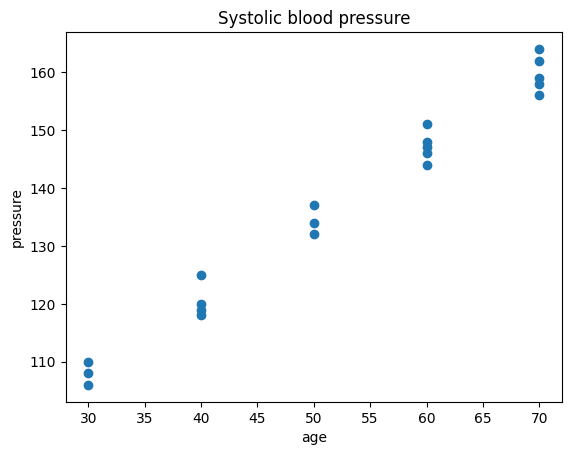

In [6]:
plt.figure()
plt.title("Systolic blood pressure")
plt.xlabel("age")
plt.ylabel("pressure")
plt.plot("age", "pressure", "o", data=df_blood)
plt.show()

From the scatter plot we notice that there is a linear relationship between the age and the pressure. The pressure increases as the age increases.

In [13]:
n, _ = df_blood.shape
X = np.column_stack((np.ones(n), df_blood.age))
y = df_blood.pressure

beta_ols = solve(X.T @ X, X.T @ y)
print("Ordinary least squares estimator:")
print(beta_ols)

Ordinary least squares estimator:
[68.78490566  1.30314465]


The ordinary least squares estimator for $\beta_0$ and $\beta_1$ are 68.78 and 1.30, respectively. This means that the pressure starts at 68.78 mm Hg and increases in a rate of 1.30 mm Hg per year.

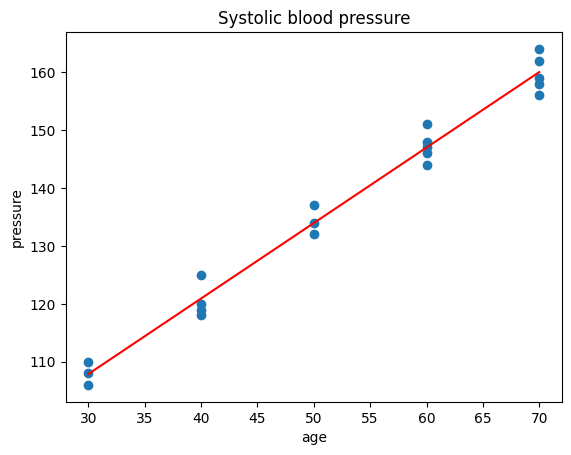

In [14]:
df_blood["avg_pressure"] = beta_ols[0] + beta_ols[1]*df_blood["age"]

plt.figure()
plt.title("Systolic blood pressure")
plt.xlabel("age")
plt.ylabel("pressure")
plt.plot("age", "pressure", "o", data=df_blood)
plt.plot("age", "avg_pressure", "r-", data=df_blood)
plt.show()

Once the model is fitted, we can predict values for unobserved data. For example, we can tell from the model that the average blood pressure for a 45 years old person is approximately 125 mm Hg.

## Mean Squared Error and other metrics

When we train a model, we want to measure in some way its performance. There are a couple of metrics that can be used for linear regression.

- **Mean Squared Error**: The mean squared error (mse) is defined as the average of the squared differences between the observed independent variable and the value predicted by the model
$$MSE(\mathbf{y}, \hat{\mathbf{y}}) = \frac{1}{n}\sum_{i=1}^{n} (y_i - \hat{y}_i)^2$$

The least squares estimator minimizes the mean squared error. Therefore, we will expect a small *mse* in a good model. However, what is considered a good *mse* in a model? Because the mean squared error is not in the same scale as the data, we might want to compute its square root.

- **Root Mean Squared Error**: As the name suggests, it is defined as the squared root of the mean squared error.

- **Coefficient of determination**: The coefficient of determination ($R^2$) is defined as one minus the ratio of the sum of the squared differences between the observed independent variable and the value predicted by the model, and the sum of the squared differences between the observed independent variable and its average
$$R^2 = 1 - \frac{\sum_{i=1}^{n} (y_i - \hat{y}_i)^2}{\sum_{i=1}^{n} (y_i - \bar{y})^2}$$

The coefficient of determination compares the model against a baseline model that always predicts $\bar{y}$. In the best case, the predicted values match exactly the observed values, so $R^2 = 1$. Models that have worse predictions than the baseline model will have a negative $R^2$. Most of the time, $R^2$ lies between $0$ and $1$.

In [16]:
mse = np.mean((df_blood.pressure - df_blood.avg_pressure)**2)
print("Mean squared error:", mse)
rmse = np.sqrt(mse)
print("Root mean squared error:", rmse)
r2 = 1 - (np.sum((df_blood.pressure - df_blood.avg_pressure)**2) /
          np.sum((df_blood.pressure - df_blood.pressure.mean())**2))
print("Coefficient of determination:", r2)

Mean squared error: 5.945534591194968
Root mean squared error: 2.438346692165609
Coefficient of determination: 0.9826892954312147


From our previous example, we have a mean squared error of 5.94, a root mean squared error of 2.43 and a coefficient of determination of 0.98. This means that 95% of the time, the pressure will be at most 4.77 units away from the values predicted by the model (1.96 times the root mean squared error). The coefficient of determination implies that 98% of the variations in the dependent variable can be explained by the independent variables.

## Maximum likelihood estimator